In [1]:
# Install latest version from GitHub
!pip install -q -U git+https://github.com/jdvelasq/techminer

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from techminer import DataFrame, Plot

#
# Data loading
#
df = DataFrame(
    pd.read_json(
        "https://raw.githubusercontent.com/jdvelasq/techminer/master/data/tutorial/"
        + "cleaned-data.json",
        orient="records",
        lines=True,
    )
)

# Co-ocurrence analysis

In [1]:
#
# Data loading
#
import matplotlib.pyplot as plt
import pandas as pd

url = "https://raw.githubusercontent.com/jdvelasq/techminer/master/data/tutorial/"
df = pd.read_json(url + "cleaned-data.json", orient="records", lines=True)

In [2]:
from techminer import DataFrame, Plot

df = DataFrame(df)

## Authors vs Source Title example

In [5]:
#
# Top 10 most frequent authors
#
top_authors = df.documents_by_term('Authors').head(10)
top_authors = top_authors.Authors
top_authors

0       Arevalo A.
1       Gabbouj M.
2     Hernandez G.
3     Hussain A.J.
4     Iosifidis A.
5    Kanniainen J.
6          Leon D.
7          Nino J.
8      Passalis N.
9      Sandoval J.
Name: Authors, dtype: object

In [7]:
#
# Top 10 most frequent Source titles
#
top_sources = df.documents_by_term('Source title').head(10)
top_sources = top_sources['Source title']
top_sources

0    Lecture Notes in Computer Science (including s...
1                     Expert Systems with Applications
2                                          IEEE Access
3                            Procedia Computer Science
4        Advances in Intelligent Systems and Computing
5                       Applied Soft Computing Journal
6                    Neural Computing and Applications
7       ACM International Conference Proceeding Series
8    Communications in Computer and Information Sci...
9    International Journal of Circuits, Systems and...
Name: Source title, dtype: object

In [12]:
matrix = df.co_occurrence(
    column_IDX="Authors", column_COL="Source title", as_matrix=True 
)
matrix = matrix[[col for col in matrix.columns if col in top_sources.tolist()]]
matrix = matrix.loc[[row for row in matrix.index if row in top_authors.tolist()],:]
matrix

,ACM International Conference Proceeding Series,Advances in Intelligent Systems and Computing,Applied Soft Computing Journal,Communications in Computer and Information Science,Expert Systems with Applications,IEEE Access,"International Journal of Circuits, Systems and Signal Processing",Lecture Notes in Computer Science (including subseries Lecture Notes in Artificial Intelligence and Lecture Notes in Bioinformatics),Neural Computing and Applications,Procedia Computer Science
Arevalo A.,0,1,0,1,0,0,0,1,0,0
Gabbouj M.,0,0,0,0,0,0,0,0,0,0
Hernandez G.,0,1,0,1,0,0,0,1,0,0
Hussain A.J.,0,0,0,0,1,0,0,1,0,0
Iosifidis A.,0,0,0,0,0,0,0,0,0,0
Kanniainen J.,0,0,0,0,0,0,0,0,0,0
Leon D.,0,1,0,1,0,0,0,1,0,0
Nino J.,0,1,0,1,0,0,0,1,0,0
Passalis N.,0,0,0,0,0,0,0,0,0,0
Sandoval J.,0,1,0,1,0,0,0,1,0,0


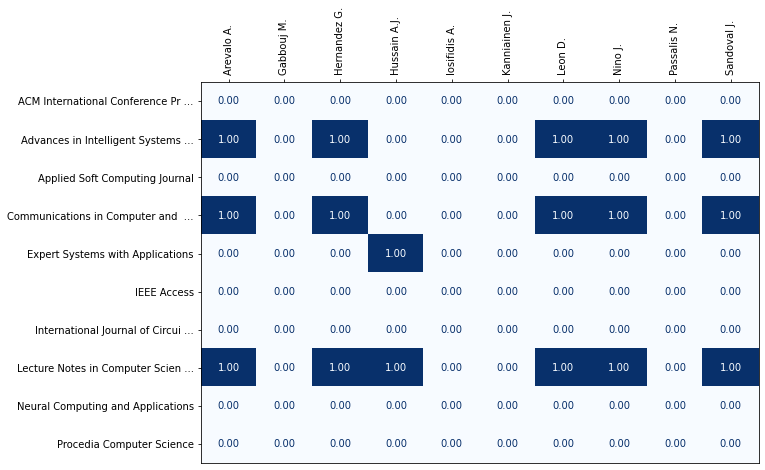

In [13]:
plt.figure(figsize=(10, 7))
Plot(matrix).heatmap(cmap='Blues')